Test Accuracy: 97.13%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



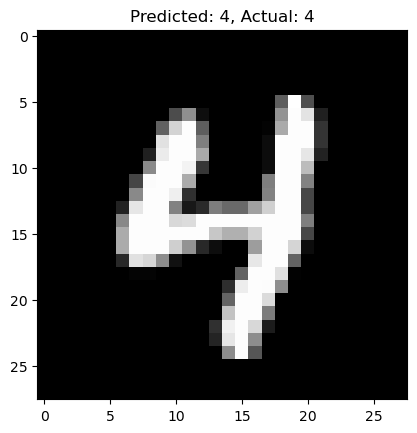

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


mnist = fetch_openml('mnist_784', version=1)


X, y = mnist["data"], mnist["target"]


y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


print(classification_report(y_test, y_pred))


index = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')


plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test.iloc[index]}")
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 97.52%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.95      0.97      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.97      0.98     14000
weighted avg       0.98      0.98      0.98     14000



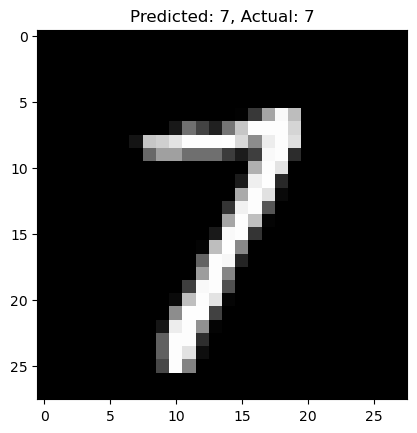

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1)


X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=6)
grid_search.fit(X_train_pca, y_train)


best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


print(classification_report(y_test, y_pred))


index = np.random.randint(0, X_test.shape[0])


plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test.iloc[index]}")  
plt.show()


In [3]:
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [4]:
y_pred = best_knn.predict(X_test)

In [5]:
#Grid search for SGD classifier

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()

pipeline = Pipeline([
    ('scaler', scaler),
    ('sgd', SGDClassifier(random_state=42, early_stopping=True))  # Enabling early stopping
])


param_grid = {
    'sgd__loss': ['log_loss', 'hinge'], 
    'sgd__alpha': [0.0001, 0.001],  
    'sgd__learning_rate': ['optimal', 'constant'], 
    'sgd__eta0': [0.01, 0.1],  
    'sgd__penalty': ['elasticnet'],  
    'sgd__max_iter': [1000]  
}


grid_search_sgd = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=6)


grid_search_sgd.fit(X_train, y_train)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Test Accuracy: 97.29%


In [15]:
print("Best parameters found: ", grid_search_sgd.best_params_)
print("Best cross-validation accuracy: ", grid_search_sgd.best_score_)

Best parameters found:  {'sgd__alpha': 0.0001, 'sgd__eta0': 0.01, 'sgd__learning_rate': 'optimal', 'sgd__loss': 'hinge', 'sgd__max_iter': 1000, 'sgd__penalty': 'elasticnet'}
Best cross-validation accuracy:  0.9110357142857142


In [17]:
y_pred = grid_search_sgd.best_estimator_.predict(X_test)

In [61]:
best_sgd = grid_search_sgd.best_estimator_

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.96      0.95      1600
           2       0.92      0.90      0.91      1380
           3       0.89      0.87      0.88      1433
           4       0.92      0.92      0.92      1295
           5       0.87      0.87      0.87      1273
           6       0.93      0.95      0.94      1396
           7       0.93      0.93      0.93      1503
           8       0.88      0.85      0.86      1357
           9       0.87      0.90      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



In [21]:
#Random forest classifier Grid search

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


rf = RandomForestClassifier(random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True, False]
}


grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=10)


grid_search_rf.fit(X_train, y_train)


best_rf = grid_search_rf.best_estimator_


y_pred_rf = best_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf * 100:.2f}%")


print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Test Accuracy: 97.23%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [31]:
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest found: {best_params_rf}")

Best parameters for Random Forest found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
y_pred_rf = best_rf.predict(X_test)

In [35]:
#Confusion matrices

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def plot_confusion_matrices(classifier, X_test, y_test, title):
    
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    
    plt.title(f'{title} Confusion Matrix')
    plt.show()


In [67]:
#KNN classifier Confusion matrix

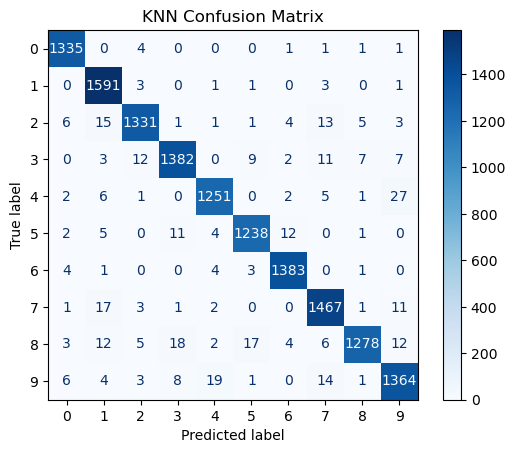

In [57]:
plot_confusion_matrices(best_knn, X_test, y_test, "KNN")

In [65]:
#SDG classifier confusion matrix

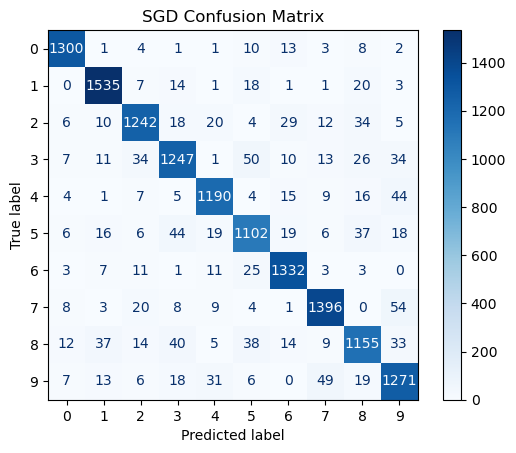

In [63]:
plot_confusion_matrices(best_sgd, X_test, y_test, "SGD")

In [69]:
#Random forest classifier confusion matrix

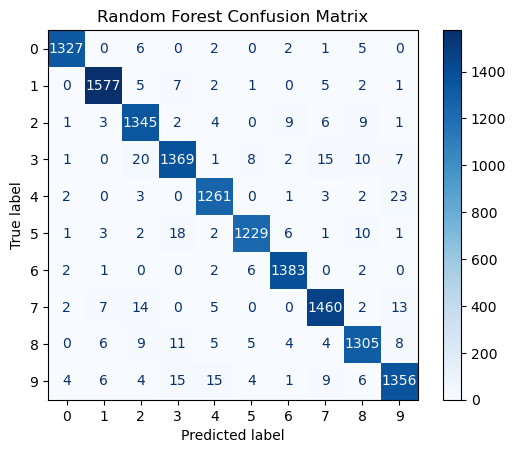

In [71]:
plot_confusion_matrices(best_rf, X_test, y_test, "Random Forest")

In [73]:
#Learning curves

In [77]:
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=10, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Learning curve data
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


In [79]:
#KNN learning curve

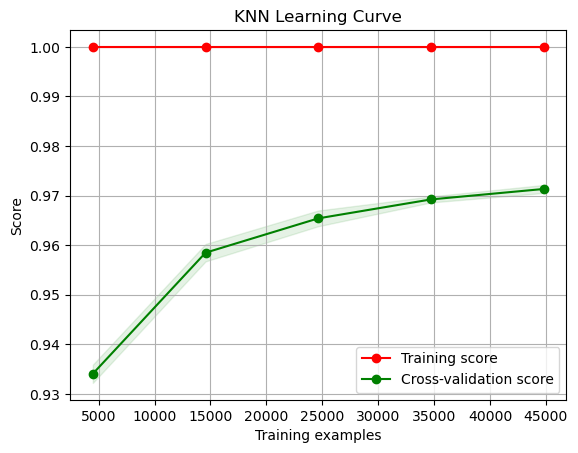

In [81]:
plot_learning_curve(best_knn, "KNN Learning Curve", X_train, y_train)

In [83]:
#SDG classifier learning curve

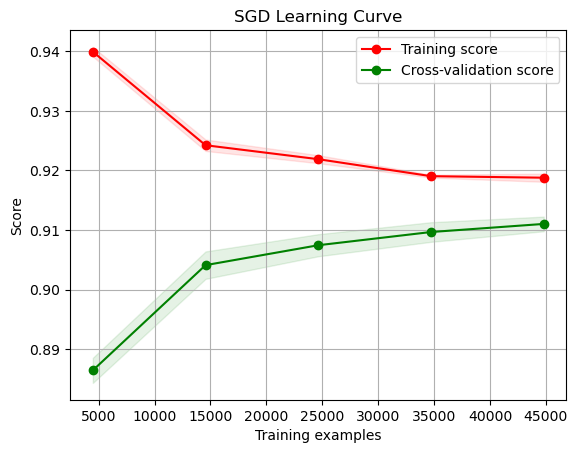

In [85]:
plot_learning_curve(best_sgd, "SGD Learning Curve", X_train, y_train)

In [87]:
#Random forest classifier Learning curve

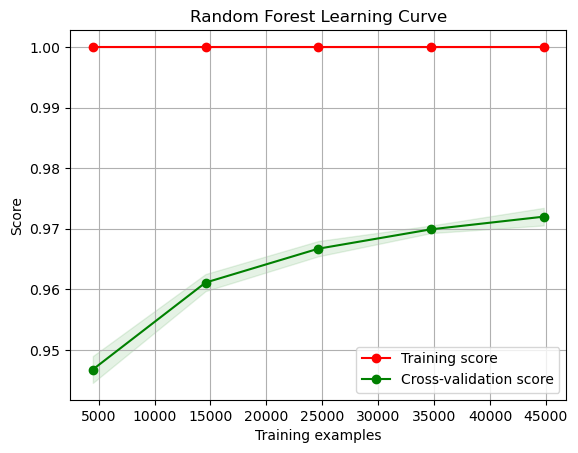

In [89]:
plot_learning_curve(best_rf, "Random Forest Learning Curve", X_train, y_train)